# Compare PCA Models
This notebook will generate a figure and datafile of all correlated components across fish and stimulus groups

In [1]:
# list of stimuli by fish
# list of matching fish-stimulus pairs
# figure showing correlation of components by fish-stimulus

In [23]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import scipy.stats as stats

In [24]:
n_components = 10
data_dir = '../data/'
input_data_dir = data_dir + 'pca_models_pickled/'
output_data_dir = data_dir + 'results/'

In [4]:
def get_subject_stimulus(filename):
    strs = filename.split('_')
    if len(strs) >= 4:
        stimulus = strs[3]
    else:
        stimulus = ''
    return strs[1], stimulus

In [5]:
def load_all_files():
    file_path_list = list(
        filter(
            lambda path: '_PCA_model_num_comp_'+ str(n_components) + '_transformed.pickle' in path if True else False,
            os.listdir(path = input_data_dir)
    ))
    ret_dict = {
        "file_name": [],
        "subject": [],
        "stimulus": [],
        "path": []
    }
    for path in file_path_list:
        file_name = path.split('_PCA_model')[0]
        subject, stimulus = get_subject_stimulus(file_name)
        ret_dict["file_name"].append(file_name)
        ret_dict["subject"].append(subject)
        ret_dict["stimulus"].append(stimulus)
        ret_dict["path"].append(path)
    return pd.DataFrame(ret_dict)

In [6]:
def open_file(file_path):
    with open(input_data_dir + file_path, "rb") as input_file:
        return pickle.load(input_file)

In [29]:
def pickle_file(file, n_components):
    with open(output_data_dir + 'component_correlation_df_num_comp_' + str(n_components) + '.pickle', 'wb') as pickle_file:
        pickle.dump(file, pickle_file, protocol=pickle.HIGHEST_PROTOCOL)

In [7]:
def load_file_data(file_path_list):
    ret_list = []
    for path in file_path_list:
        ret_list.append(open_file(path))
    return np.reshape(ret_list, (-1, 1))

In [8]:
def fetch_component(comp_index_name, file_df):
    ret_array = comp_index_name.split('_component_')
    old_index, comp_num = ret_array[0], ret_array[1]
    component = file_df.loc[old_index].at['file_data'][:,int(comp_num)]
    return component

In [9]:
def scale_component_functions(comp_1, comp_2):
    if comp_1.size == comp_2.size:
        return comp_1, comp_2
    elif comp_1.size > comp_2.size:
        return scale_component_functions(comp_2, comp_1)
    while comp_1.size < comp_2.size:
        comp_1 = np.concatenate((comp_1, comp_1), axis=None)
    comp_1 = comp_1[0:comp_2.size]
    return comp_1, comp_2

In [10]:
def correlate_two_components(comp_1, comp_2, col, row):
    comp_1, comp_2 = scale_component_functions(comp_1, comp_2)
    corr = stats.spearmanr(comp_1, comp_2)
    if np.abs(corr.correlation) > .75:
        print(col, ' ', row, ' ', corr)
        plt.plot(comp_1, comp_2)
        plt.show()
    return corr.correlation

In [11]:
def correlate_all_models(file_df):
    original_index = file_df.index
    new_index = []
    for index in original_index:
        new_index = new_index + list(map(lambda num: index + '_component_' + str(num), range(0,10)))
    analysis_df = pd.DataFrame(np.zeros((len(new_index), len(new_index))), index=new_index, columns=new_index)
    for col in analysis_df.columns:
        comp_1 = fetch_component(col, file_df)
        for row in analysis_df.index:
            if col == row:
                break;
            else:
                comp_2 = fetch_component(row, file_df)
                analysis_df.at[row, col] = correlate_two_components(comp_1, comp_2, col, row)
    return analysis_df

subject_10_stimulus_11_component_0   subject_10_stimulus_10_component_0   SpearmanrResult(correlation=0.7655488749767557, pvalue=1.237236204815639e-43)


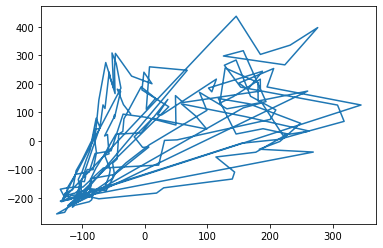

subject_10_stimulus_12_component_0   subject_10_stimulus_10_component_0   SpearmanrResult(correlation=0.8176081774792492, pvalue=3.57938758661198e-54)


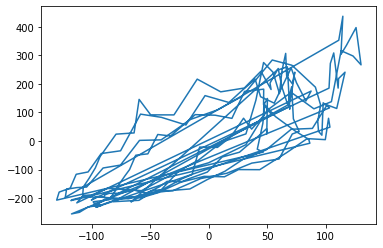

subject_10_stimulus_12_component_1   subject_10_stimulus_10_component_1   SpearmanrResult(correlation=-0.8655325335422032, pvalue=2.1431729594765032e-67)


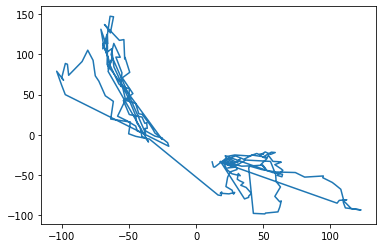

subject_10_stimulus_12_component_4   subject_10_stimulus_10_component_4   SpearmanrResult(correlation=-0.7604402044369811, pvalue=9.51828611178616e-43)


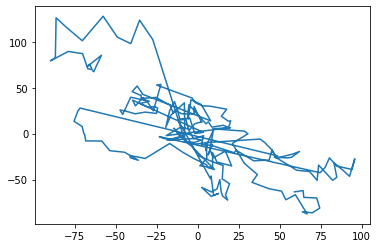

subject_10_stimulus_12_component_4   subject_10_stimulus_11_component_4   SpearmanrResult(correlation=0.7676439595859418, pvalue=5.278415108614688e-44)


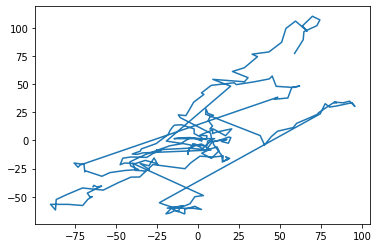

subject_10_stimulus_12_component_9   subject_10_stimulus_11_component_8   SpearmanrResult(correlation=0.7763240788220643, pvalue=1.4037684928027932e-45)


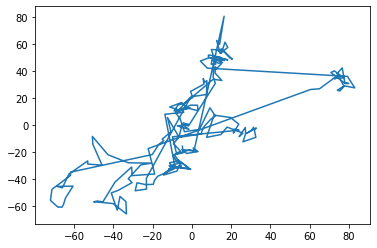

subject_10_stimulus_15_component_0   subject_10_stimulus_14_component_0   SpearmanrResult(correlation=0.8908067542213884, pvalue=1.3760702628687601e-14)


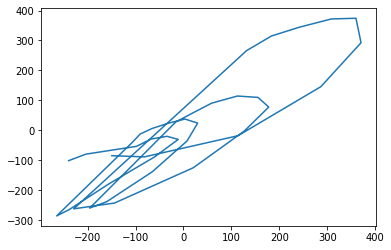

subject_10_stimulus_15_component_1   subject_10_stimulus_14_component_1   SpearmanrResult(correlation=0.851969981238274, pvalue=3.136498186033501e-12)


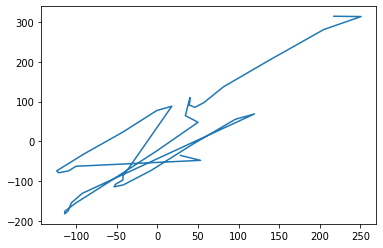

subject_10_stimulus_15_component_6   subject_10_stimulus_14_component_5   SpearmanrResult(correlation=-0.8433395872420263, pvalue=8.503724696118514e-12)


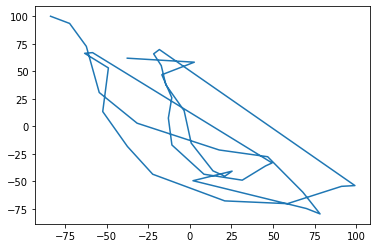

subject_10_stimulus_15_component_7   subject_10_stimulus_14_component_6   SpearmanrResult(correlation=0.7607879924953096, pvalue=1.2180122261694741e-08)


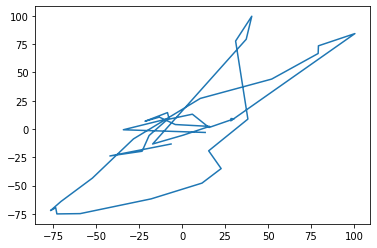

subject_10_stimulus_22_component_4   subject_10_stimulus_21_component_5   SpearmanrResult(correlation=0.7848828836837193, pvalue=1.434007828634005e-32)


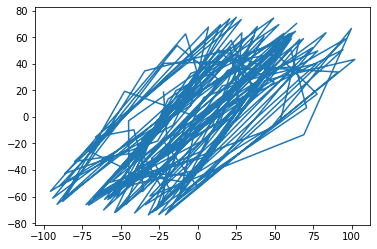

subject_10_stimulus_22_component_5   subject_10_stimulus_21_component_4   SpearmanrResult(correlation=-0.8060144895328681, pvalue=1.5866591588087423e-35)


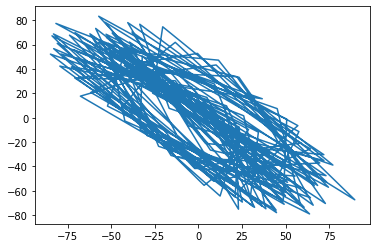

subject_12_stimulus_11_component_0   subject_12_stimulus_10_component_0   SpearmanrResult(correlation=0.897158095915374, pvalue=2.2016909664666168e-54)


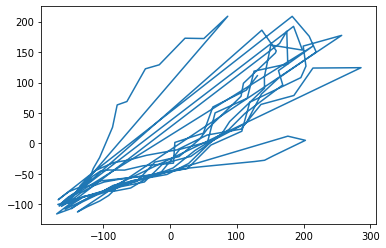

subject_12_stimulus_11_component_3   subject_10_stimulus_23_component_6   SpearmanrResult(correlation=0.7680456021301071, pvalue=3.4904907176195668e-40)


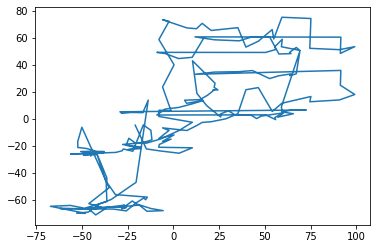

subject_12_stimulus_12_component_0   subject_12_stimulus_10_component_0   SpearmanrResult(correlation=0.8461798302146762, pvalue=2.6960711464814344e-42)


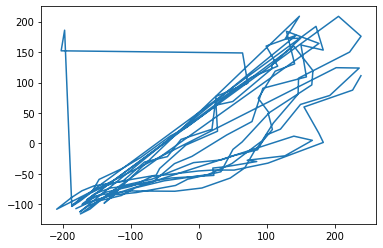

subject_12_stimulus_12_component_0   subject_12_stimulus_11_component_0   SpearmanrResult(correlation=0.8552646784301524, pvalue=4.2410035584456047e-44)


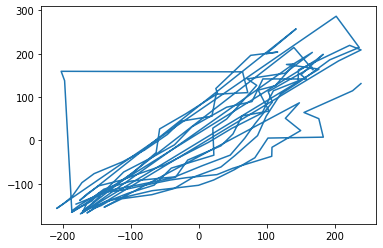

subject_12_stimulus_12_component_2   subject_10_stimulus_23_component_6   SpearmanrResult(correlation=0.7846573288960734, pvalue=5.506080520644813e-43)


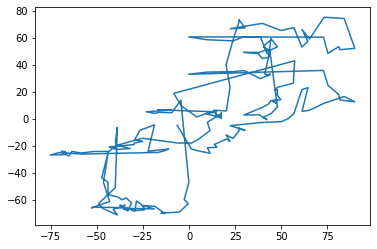

subject_12_stimulus_12_component_2   subject_12_stimulus_11_component_3   SpearmanrResult(correlation=0.8291337392773013, pvalue=3.3027510454581203e-39)


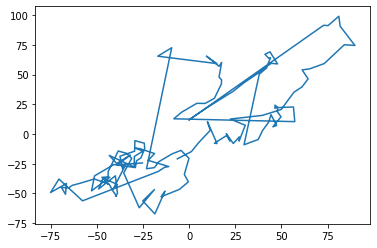

subject_12_stimulus_15_component_0   subject_12_stimulus_14_component_0   SpearmanrResult(correlation=0.8930769230769231, pvalue=1.9182888939284534e-09)


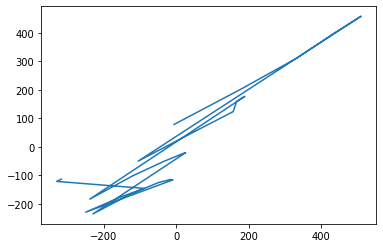

subject_12_stimulus_15_component_1   subject_12_stimulus_14_component_1   SpearmanrResult(correlation=0.7969230769230768, pvalue=1.8647589388808114e-06)


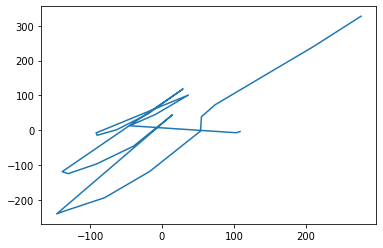

subject_12_stimulus_15_component_4   subject_12_stimulus_14_component_3   SpearmanrResult(correlation=0.786923076923077, pvalue=3.07378762355214e-06)


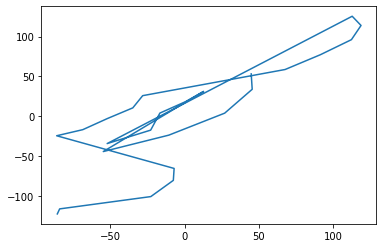

subject_12_stimulus_9_component_0   subject_12_stimulus_10_component_0   SpearmanrResult(correlation=0.8951491177385663, pvalue=8.5390667346994e-54)


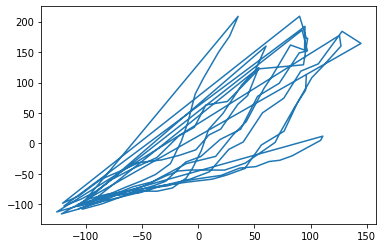

subject_12_stimulus_9_component_0   subject_12_stimulus_11_component_0   SpearmanrResult(correlation=0.8905053557935909, pvalue=1.7681734908579088e-52)


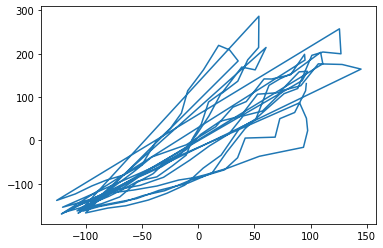

subject_12_stimulus_9_component_0   subject_12_stimulus_12_component_0   SpearmanrResult(correlation=0.8058118138583937, pvalue=1.7003715931377977e-35)


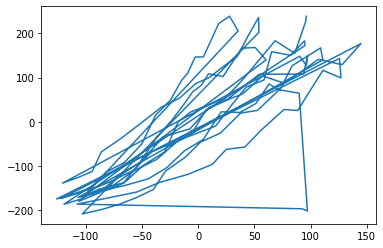

subject_12_stimulus_9_component_3   subject_12_stimulus_10_component_6   SpearmanrResult(correlation=0.7694297524334415, pvalue=1.3032905332493877e-30)


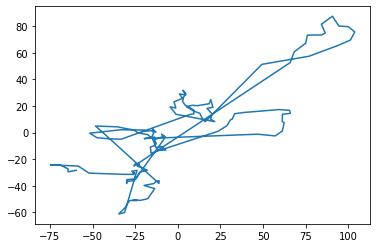

subject_12_stimulus_9_component_9   subject_12_stimulus_10_component_9   SpearmanrResult(correlation=-0.8103524601093383, pvalue=3.535627953219206e-36)


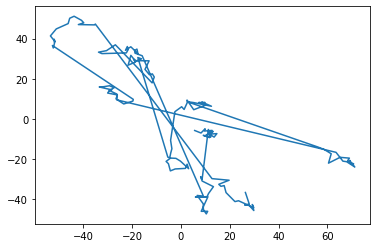

subject_13_stimulus_0_component_1   subject_10_stimulus_1_component_0   SpearmanrResult(correlation=-0.7726398270240162, pvalue=9.341523516551122e-61)


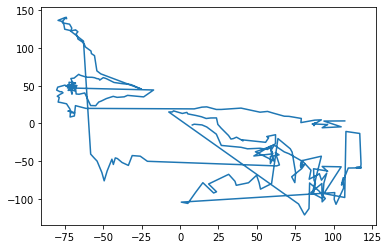

subject_13_stimulus_11_component_0   subject_13_stimulus_10_component_2   SpearmanrResult(correlation=0.8752460984393757, pvalue=9.397455611049116e-17)


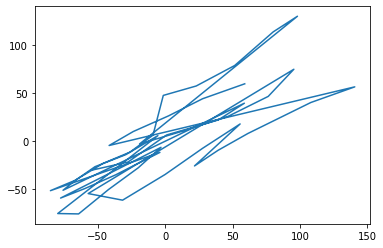

subject_13_stimulus_11_component_1   subject_13_stimulus_10_component_0   SpearmanrResult(correlation=0.7986074429771908, pvalue=3.693461508463864e-12)


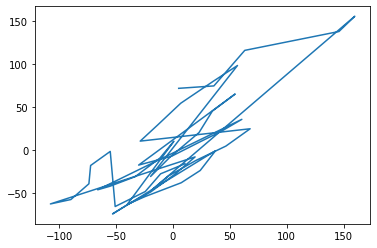

subject_13_stimulus_11_component_6   subject_12_stimulus_14_component_3   SpearmanrResult(correlation=0.7760722120448885, pvalue=3.574680216154401e-11)


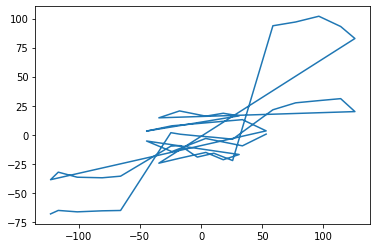

subject_13_stimulus_12_component_0   subject_13_stimulus_11_component_1   SpearmanrResult(correlation=0.7561584633853542, pvalue=2.1590906555953343e-10)


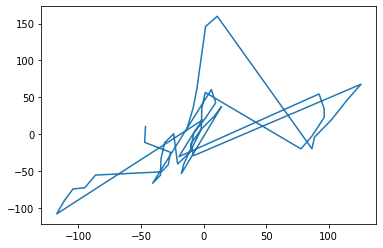

subject_13_stimulus_12_component_3   subject_13_stimulus_10_component_6   SpearmanrResult(correlation=0.7811284513805522, pvalue=2.1987455493156642e-11)


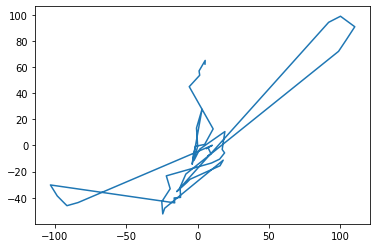

subject_13_stimulus_14_component_5   subject_10_stimulus_13_component_4   SpearmanrResult(correlation=-0.7884712828950212, pvalue=4.344384579616418e-44)


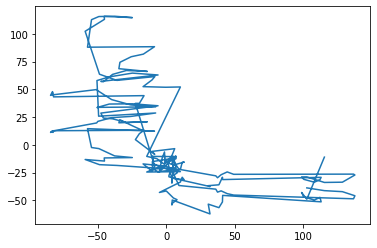

subject_13_stimulus_15_component_0   subject_13_stimulus_14_component_0   SpearmanrResult(correlation=0.8691509150915091, pvalue=9.93268452784802e-32)


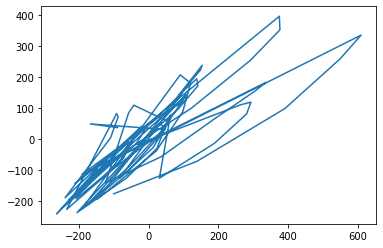

subject_13_stimulus_15_component_1   subject_13_stimulus_14_component_1   SpearmanrResult(correlation=0.851101110111011, pvalue=3.5429010340232664e-29)


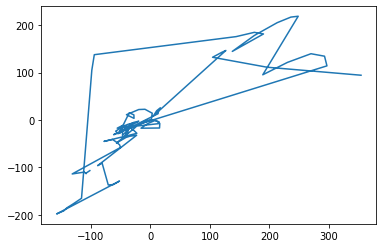

subject_13_stimulus_15_component_6   subject_10_stimulus_13_component_4   SpearmanrResult(correlation=-0.7875802249231747, pvalue=6.299841036063185e-44)


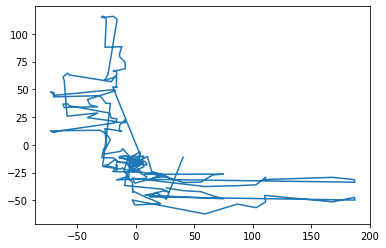

subject_13_stimulus_15_component_6   subject_13_stimulus_14_component_5   SpearmanrResult(correlation=0.8344554455445544, pvalue=4.174677985139966e-27)


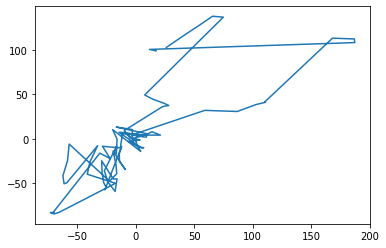

subject_13_stimulus_15_component_7   subject_13_stimulus_14_component_6   SpearmanrResult(correlation=-0.7536873687368737, pvalue=1.4497351099948724e-19)


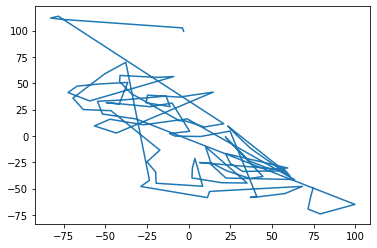

subject_13_stimulus_15_component_8   subject_13_stimulus_14_component_4   SpearmanrResult(correlation=0.8568376837683767, pvalue=5.974368186921716e-30)


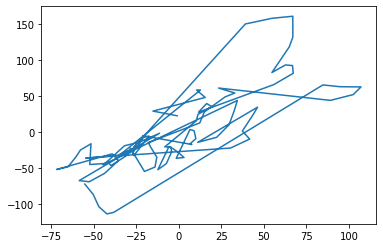

subject_13_stimulus_9_component_1   subject_13_stimulus_10_component_0   SpearmanrResult(correlation=0.765282112845138, pvalue=9.681295464218799e-11)


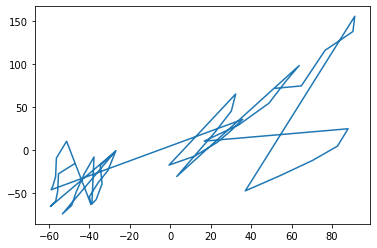

subject_13_stimulus_9_component_1   subject_13_stimulus_12_component_4   SpearmanrResult(correlation=0.8204081632653061, pvalue=3.0749011358666314e-13)


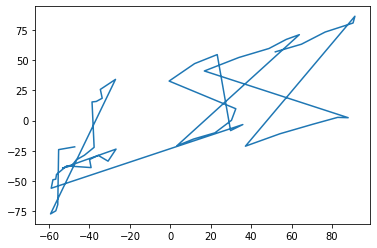

subject_13_stimulus_9_component_7   subject_10_stimulus_14_component_3   SpearmanrResult(correlation=0.8187800428233739, pvalue=3.744422499844682e-13)


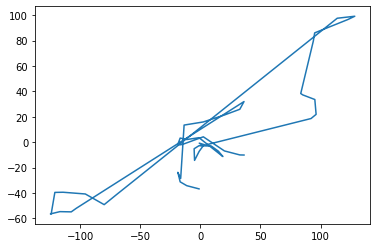

subject_14_stimulus_10_component_0   subject_13_stimulus_9_component_0   SpearmanrResult(correlation=-0.7758348241001052, pvalue=3.6560510805044644e-11)


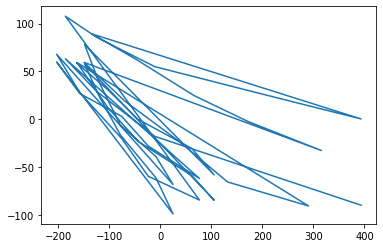

subject_14_stimulus_10_component_3   subject_12_stimulus_14_component_0   SpearmanrResult(correlation=-0.7964386319434099, pvalue=1.4087630123696922e-07)


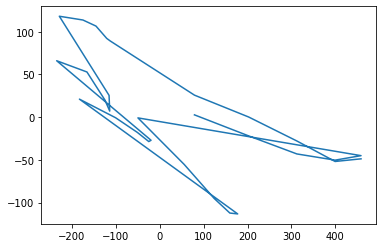

subject_14_stimulus_10_component_3   subject_12_stimulus_15_component_0   SpearmanrResult(correlation=-0.8227046348973849, pvalue=2.423028459273616e-08)


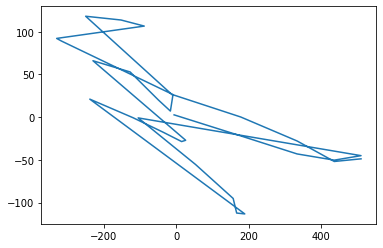

subject_14_stimulus_11_component_0   subject_14_stimulus_10_component_0   SpearmanrResult(correlation=0.8941045606229142, pvalue=2.8279288578362313e-11)


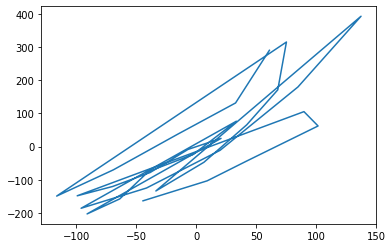

subject_14_stimulus_11_component_1   subject_12_stimulus_14_component_0   SpearmanrResult(correlation=-0.8805788786942789, pvalue=1.3958248852798782e-10)


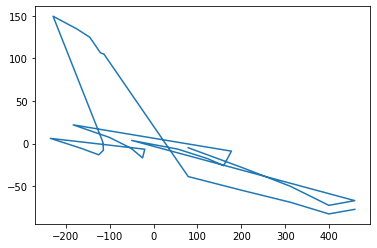

subject_14_stimulus_11_component_1   subject_12_stimulus_15_component_0   SpearmanrResult(correlation=-0.9121871195371978, pvalue=2.3054924085881784e-12)


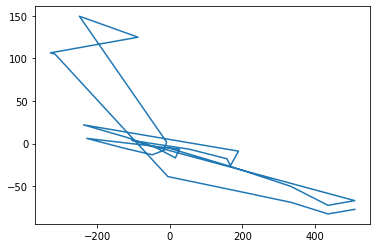

subject_14_stimulus_11_component_2   subject_10_stimulus_22_component_0   SpearmanrResult(correlation=-0.7553254066099877, pvalue=5.940599464374149e-29)


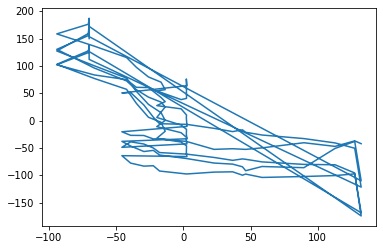

subject_14_stimulus_11_component_2   subject_12_stimulus_11_component_0   SpearmanrResult(correlation=0.7709077452897721, pvalue=8.597809543704008e-31)


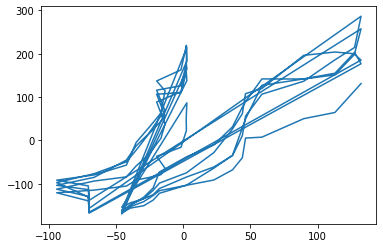

subject_14_stimulus_11_component_2   subject_12_stimulus_12_component_0   SpearmanrResult(correlation=0.7667987039255825, pvalue=2.7122052889912888e-30)


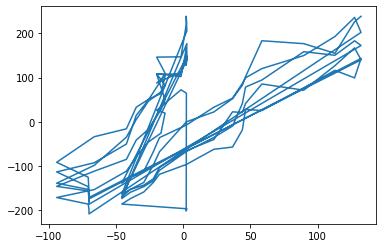

subject_14_stimulus_11_component_2   subject_12_stimulus_9_component_0   SpearmanrResult(correlation=0.818668680626783, pvalue=1.7795426828523418e-37)


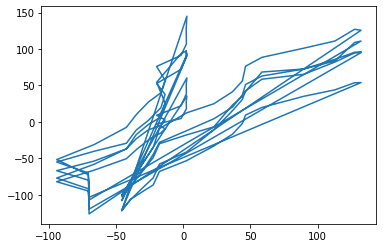

subject_14_stimulus_11_component_4   subject_12_stimulus_14_component_1   SpearmanrResult(correlation=-0.9081804411204896, pvalue=4.198080555873737e-12)


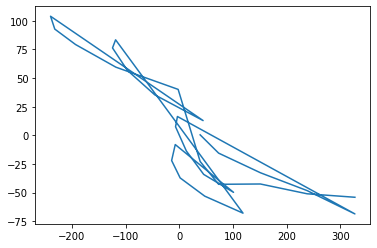

subject_14_stimulus_11_component_4   subject_13_stimulus_10_component_1   SpearmanrResult(correlation=-0.7787173610649952, pvalue=2.77656535338169e-11)


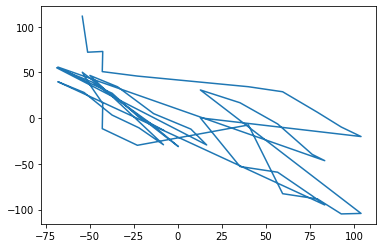

subject_14_stimulus_11_component_5   subject_13_stimulus_10_component_9   SpearmanrResult(correlation=0.8551526329173246, pvalue=2.672037597662582e-15)


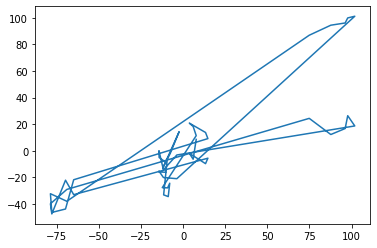

subject_14_stimulus_11_component_5   subject_14_stimulus_10_component_2   SpearmanrResult(correlation=0.7917686318131256, pvalue=1.875980690808134e-07)


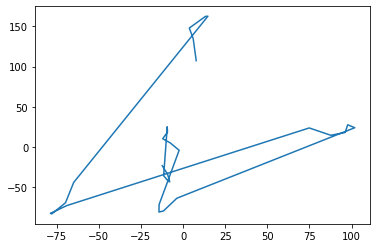

subject_14_stimulus_11_component_7   subject_14_stimulus_10_component_8   SpearmanrResult(correlation=0.7650723025583982, pvalue=8.487708184692093e-07)


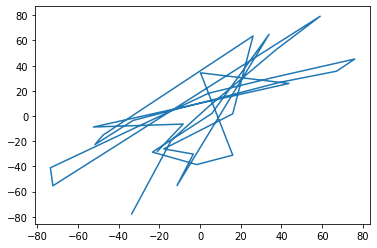

subject_14_stimulus_11_component_9   subject_12_stimulus_14_component_8   SpearmanrResult(correlation=0.7632722383828822, pvalue=9.330686140698474e-07)


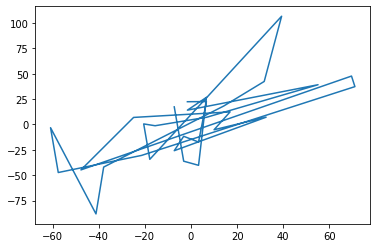

subject_14_stimulus_12_component_2   subject_12_stimulus_14_component_0   SpearmanrResult(correlation=-0.8549806554764218, pvalue=1.7949764560301459e-09)


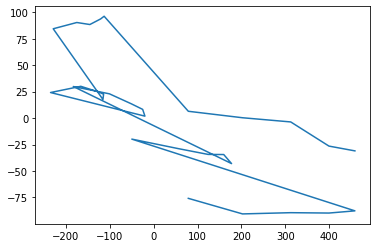

subject_14_stimulus_12_component_2   subject_12_stimulus_15_component_0   SpearmanrResult(correlation=-0.8629940123098379, pvalue=8.530102692175085e-10)


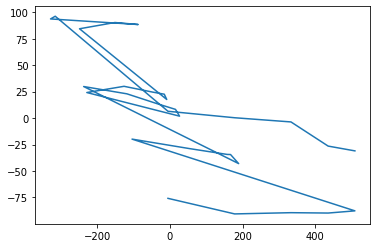

subject_14_stimulus_12_component_2   subject_14_stimulus_10_component_3   SpearmanrResult(correlation=0.8269187986651836, pvalue=1.7787676215196204e-08)


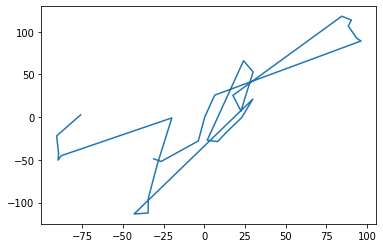

subject_14_stimulus_12_component_3   subject_12_stimulus_15_component_4   SpearmanrResult(correlation=0.8899277949999309, pvalue=4.7328358953580746e-11)


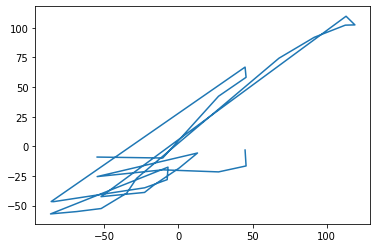

subject_14_stimulus_12_component_6   subject_12_stimulus_14_component_1   SpearmanrResult(correlation=-0.8100168199111426, pvalue=5.864857605080145e-08)


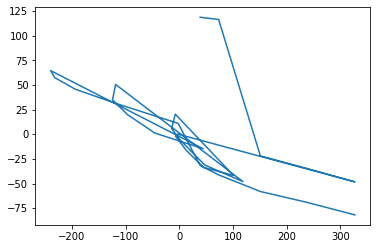

subject_14_stimulus_12_component_6   subject_13_stimulus_10_component_1   SpearmanrResult(correlation=-0.7864041263047015, pvalue=1.3060023694645135e-11)


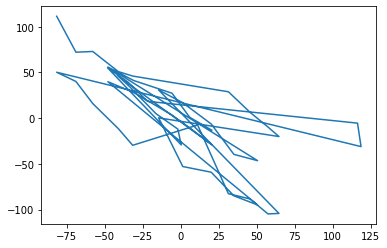

subject_14_stimulus_12_component_6   subject_14_stimulus_11_component_4   SpearmanrResult(correlation=0.850055617352614, pvalue=2.7748862781578192e-09)


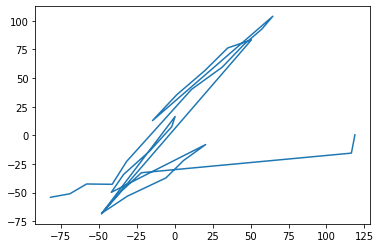

subject_14_stimulus_14_component_2   subject_14_stimulus_10_component_0   SpearmanrResult(correlation=-0.8602534968759691, pvalue=1.1328579159326155e-12)


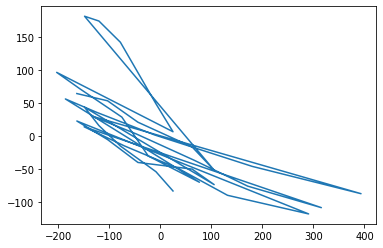

subject_14_stimulus_14_component_2   subject_14_stimulus_11_component_0   SpearmanrResult(correlation=-0.7560770424212095, pvalue=1.686361823412707e-08)


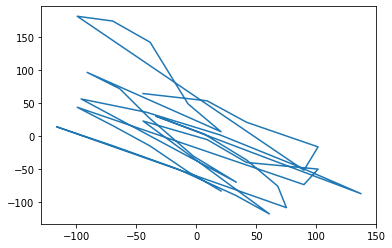

subject_14_stimulus_14_component_3   subject_10_stimulus_14_component_6   SpearmanrResult(correlation=0.7848030018761728, pvalue=2.051146149253828e-09)


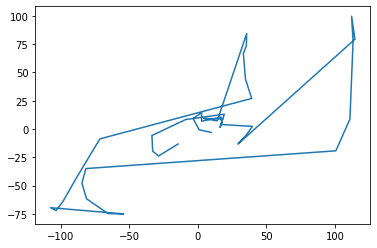

subject_14_stimulus_14_component_3   subject_10_stimulus_15_component_7   SpearmanrResult(correlation=0.7679174484052533, pvalue=7.338301306280613e-09)


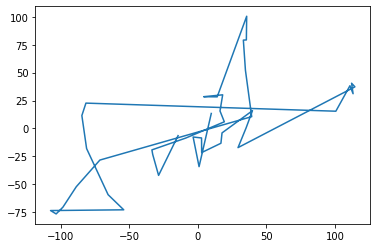

subject_14_stimulus_14_component_4   subject_10_stimulus_14_component_3   SpearmanrResult(correlation=-0.8317073170731708, pvalue=2.978575313121176e-11)


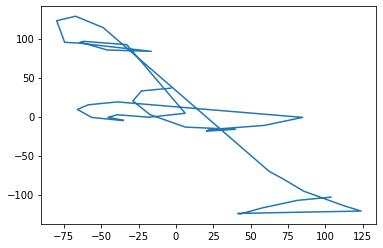

subject_14_stimulus_14_component_4   subject_10_stimulus_15_component_3   SpearmanrResult(correlation=-0.8204502814258914, pvalue=9.181587667666964e-11)


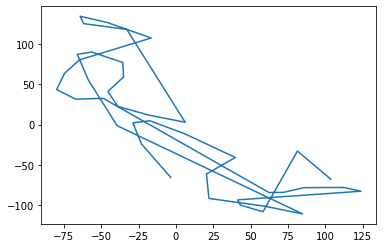

subject_14_stimulus_15_component_0   subject_14_stimulus_14_component_0   SpearmanrResult(correlation=0.8960600375234522, pvalue=5.653079120712615e-15)


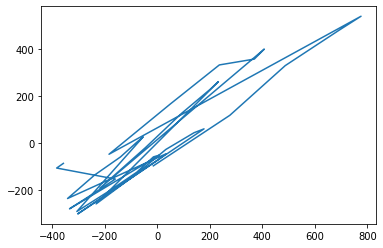

subject_14_stimulus_15_component_1   subject_14_stimulus_14_component_1   SpearmanrResult(correlation=0.7669793621013133, pvalue=7.852195302896422e-09)


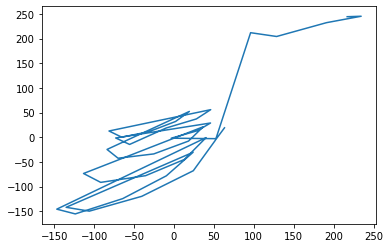

subject_14_stimulus_15_component_2   subject_14_stimulus_14_component_2   SpearmanrResult(correlation=0.8103189493433397, pvalue=2.370417550518703e-10)


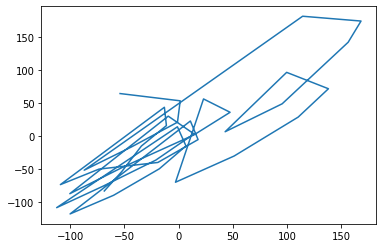

subject_14_stimulus_15_component_5   subject_10_stimulus_14_component_3   SpearmanrResult(correlation=0.8360225140712947, pvalue=1.8923099893489595e-11)


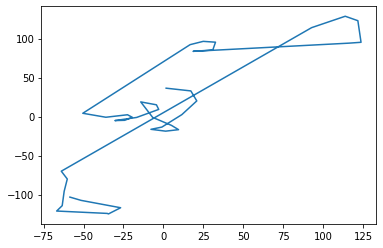

subject_14_stimulus_15_component_5   subject_13_stimulus_9_component_7   SpearmanrResult(correlation=0.79908743898941, pvalue=3.5083068271686464e-12)


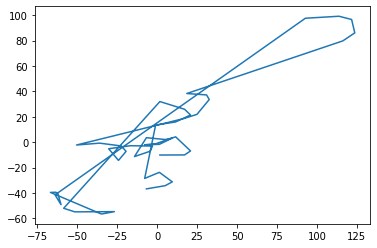

subject_14_stimulus_15_component_6   subject_13_stimulus_11_component_6   SpearmanrResult(correlation=0.8166186594757436, pvalue=4.849000318001536e-13)


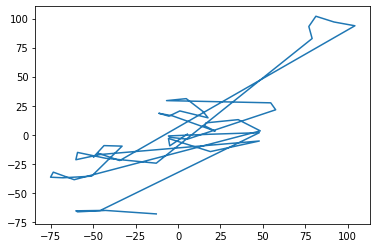

subject_14_stimulus_15_component_7   subject_14_stimulus_14_component_6   SpearmanrResult(correlation=-0.7872420262664166, pvalue=1.6902947909028362e-09)


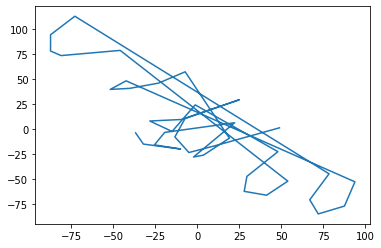

subject_14_stimulus_9_component_1   subject_12_stimulus_14_component_0   SpearmanrResult(correlation=-0.8772399800136887, pvalue=2.0100235085215374e-10)


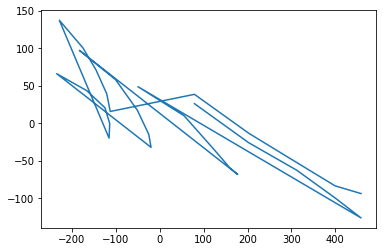

subject_14_stimulus_9_component_1   subject_12_stimulus_15_component_0   SpearmanrResult(correlation=-0.8994993045509556, pvalue=1.4074817913800989e-11)


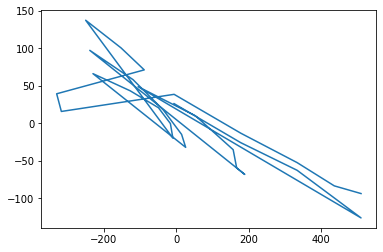

subject_14_stimulus_9_component_1   subject_13_stimulus_9_component_0   SpearmanrResult(correlation=0.8191689631389495, pvalue=3.57294004564043e-13)


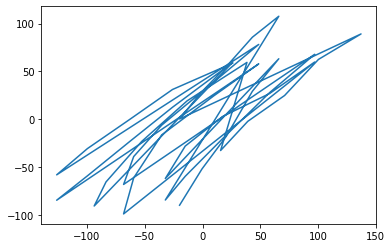

subject_14_stimulus_9_component_1   subject_14_stimulus_10_component_3   SpearmanrResult(correlation=0.8202447163515018, pvalue=2.8913981205927435e-08)


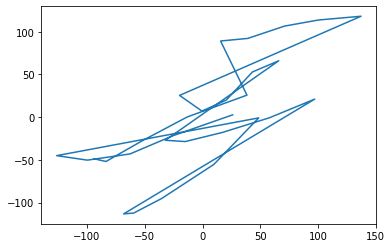

subject_14_stimulus_9_component_1   subject_14_stimulus_11_component_1   SpearmanrResult(correlation=0.8496106785317018, pvalue=2.8840678651351376e-09)


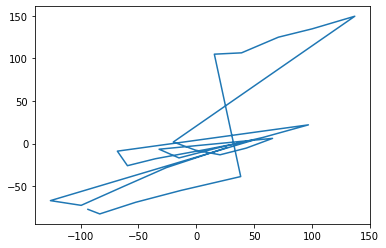

subject_14_stimulus_9_component_1   subject_14_stimulus_12_component_2   SpearmanrResult(correlation=0.7601779755283649, pvalue=1.09590752663524e-06)


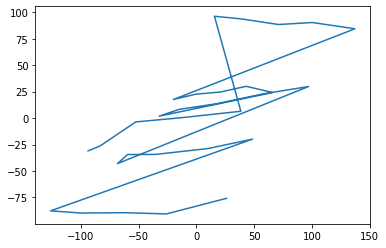

subject_14_stimulus_9_component_2   subject_12_stimulus_15_component_4   SpearmanrResult(correlation=-0.7516973896235034, pvalue=1.682909066058116e-06)


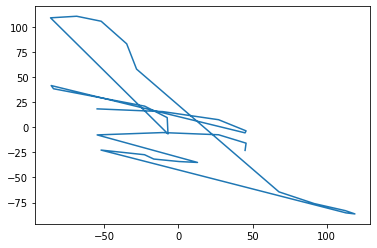

subject_14_stimulus_9_component_3   subject_14_stimulus_10_component_1   SpearmanrResult(correlation=0.7784204671857619, pvalue=4.0943561467168264e-07)


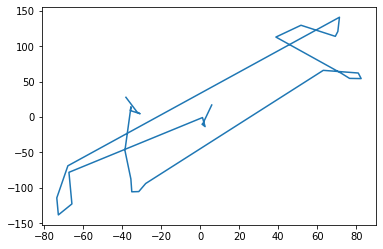

subject_14_stimulus_9_component_3   subject_14_stimulus_11_component_3   SpearmanrResult(correlation=0.785539488320356, pvalue=2.7187140432533034e-07)


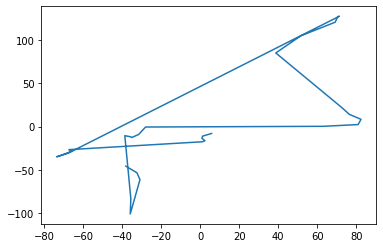

subject_14_stimulus_9_component_5   subject_14_stimulus_10_component_2   SpearmanrResult(correlation=-0.7957730812013347, pvalue=1.4681133721352516e-07)


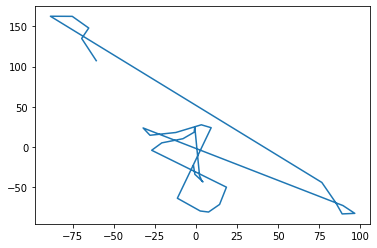

subject_15_stimulus_0_component_0   subject_12_stimulus_10_component_0   SpearmanrResult(correlation=0.7955848114698072, pvalue=2.2706787749672823e-73)


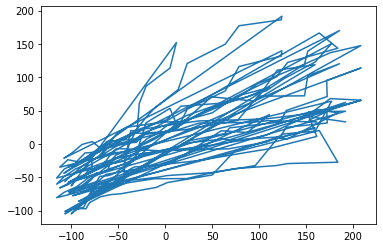

subject_15_stimulus_0_component_0   subject_12_stimulus_11_component_0   SpearmanrResult(correlation=0.7840252450722756, pvalue=6.612636133665701e-70)


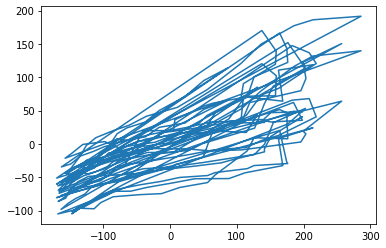

subject_15_stimulus_10_component_0   subject_12_stimulus_11_component_0   SpearmanrResult(correlation=0.7968475401003031, pvalue=5.351190656244779e-54)


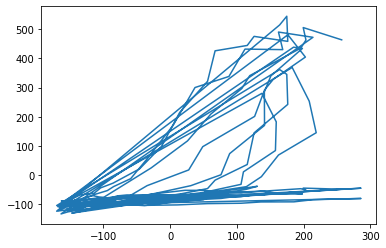

subject_15_stimulus_10_component_0   subject_12_stimulus_9_component_0   SpearmanrResult(correlation=0.7771870925540004, pvalue=8.80313697916666e-50)


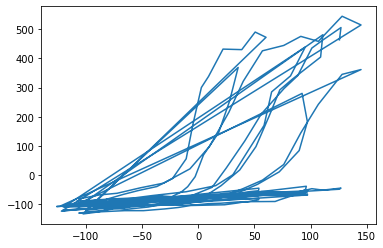

subject_15_stimulus_11_component_0   subject_12_stimulus_10_component_0   SpearmanrResult(correlation=0.8073075614138485, pvalue=1.953919215592395e-56)


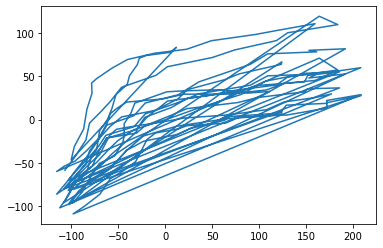

subject_15_stimulus_11_component_0   subject_12_stimulus_11_component_0   SpearmanrResult(correlation=0.8815672454875384, pvalue=1.5080646777641134e-79)


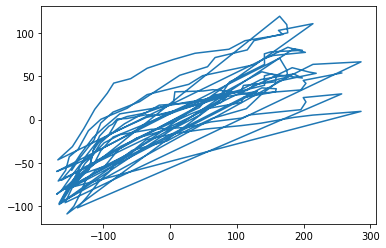

subject_15_stimulus_11_component_0   subject_12_stimulus_12_component_0   SpearmanrResult(correlation=0.7945553548412952, pvalue=1.7521500508269113e-53)


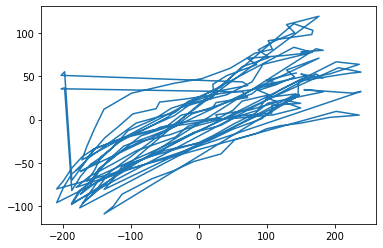

subject_15_stimulus_11_component_0   subject_12_stimulus_9_component_0   SpearmanrResult(correlation=0.8591619050084639, pvalue=3.3490832891180375e-71)


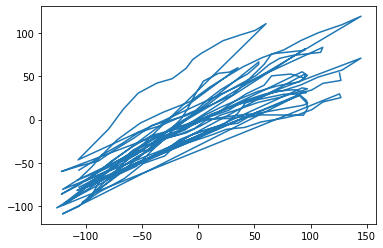

subject_15_stimulus_11_component_0   subject_15_stimulus_10_component_0   SpearmanrResult(correlation=0.8942186496293336, pvalue=4.7881303947017847e-85)


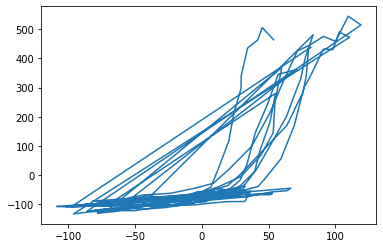

subject_15_stimulus_11_component_3   subject_15_stimulus_10_component_2   SpearmanrResult(correlation=-0.8576746124064653, pvalue=1.0646708063529561e-70)


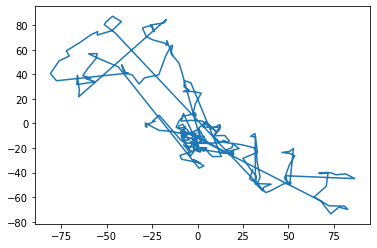

subject_15_stimulus_12_component_0   subject_12_stimulus_10_component_0   SpearmanrResult(correlation=-0.8964879348387328, pvalue=4.1705744367219374e-86)


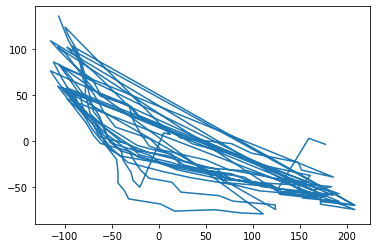

subject_15_stimulus_12_component_0   subject_12_stimulus_11_component_0   SpearmanrResult(correlation=-0.8170475040785217, pvalue=7.6366229043686235e-59)


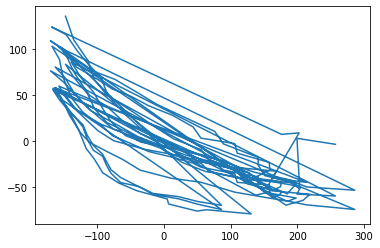

subject_15_stimulus_12_component_0   subject_12_stimulus_12_component_0   SpearmanrResult(correlation=-0.8337720794241181, pvalue=2.473023141980483e-63)


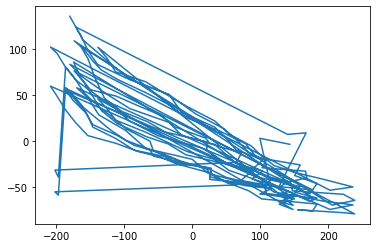

subject_15_stimulus_12_component_0   subject_12_stimulus_9_component_0   SpearmanrResult(correlation=-0.851336095461046, pvalue=1.2753091797938674e-68)


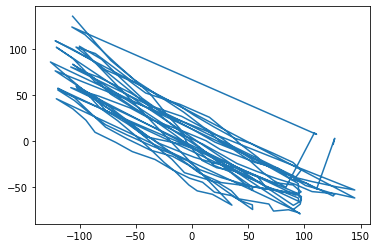

subject_15_stimulus_14_component_0   subject_12_stimulus_14_component_0   SpearmanrResult(correlation=0.8773575155980476, pvalue=6.39483427689511e-17)


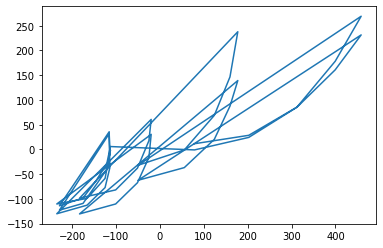

subject_15_stimulus_14_component_0   subject_12_stimulus_15_component_0   SpearmanrResult(correlation=0.8360361868239884, pvalue=4.171261761025741e-14)


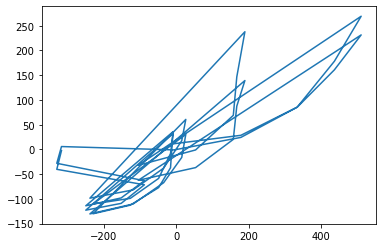

subject_15_stimulus_14_component_0   subject_14_stimulus_9_component_1   SpearmanrResult(correlation=-0.8622148484813047, pvalue=8.751147785494787e-16)


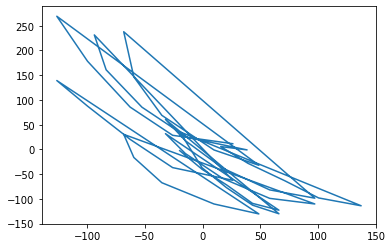

subject_15_stimulus_14_component_1   subject_12_stimulus_14_component_1   SpearmanrResult(correlation=0.8935016626539591, pvalue=2.608546600815542e-18)


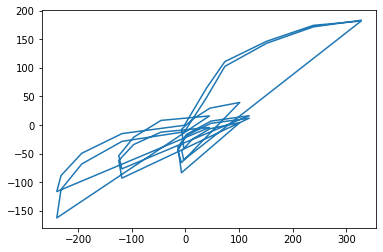

subject_15_stimulus_14_component_1   subject_12_stimulus_15_component_1   SpearmanrResult(correlation=0.7991352792676192, pvalue=3.4903428789345455e-12)


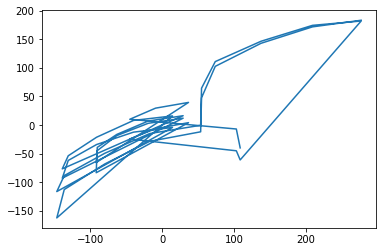

subject_15_stimulus_14_component_3   subject_10_stimulus_15_component_2   SpearmanrResult(correlation=0.7566762946347999, pvalue=2.0649407481023981e-10)


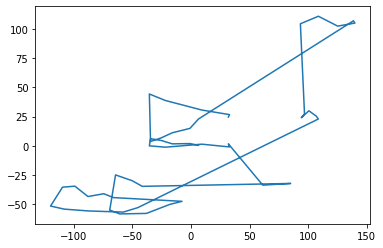

subject_15_stimulus_14_component_8   subject_12_stimulus_14_component_4   SpearmanrResult(correlation=0.8537178716947487, pvalue=3.328165652971132e-15)


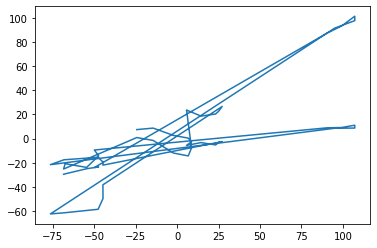

subject_15_stimulus_14_component_9   subject_13_stimulus_11_component_4   SpearmanrResult(correlation=0.776422569027611, pvalue=3.457710756190443e-11)


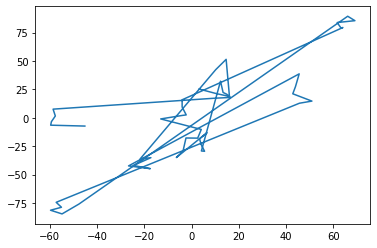

subject_15_stimulus_14_component_9   subject_14_stimulus_14_component_6   SpearmanrResult(correlation=-0.8142651531638797, pvalue=6.400875044327658e-13)


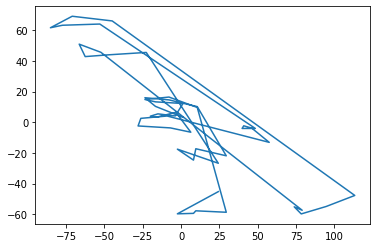

subject_15_stimulus_15_component_0   subject_12_stimulus_14_component_0   SpearmanrResult(correlation=0.8650572130792578, pvalue=5.487077504371342e-16)


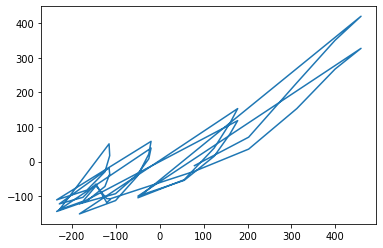

subject_15_stimulus_15_component_0   subject_12_stimulus_15_component_0   SpearmanrResult(correlation=0.9413575271411253, pvalue=2.727853911184867e-24)


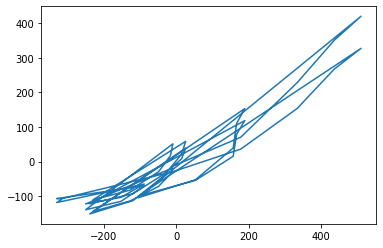

subject_15_stimulus_15_component_0   subject_14_stimulus_11_component_1   SpearmanrResult(correlation=-0.8376652419969927, pvalue=3.346852647116392e-14)


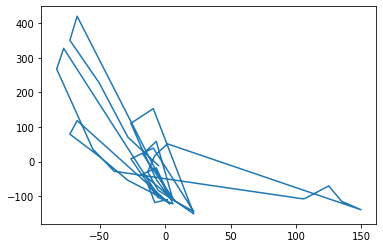

subject_15_stimulus_15_component_0   subject_14_stimulus_9_component_1   SpearmanrResult(correlation=-0.8721596010101745, pvalue=1.6294172140842748e-16)


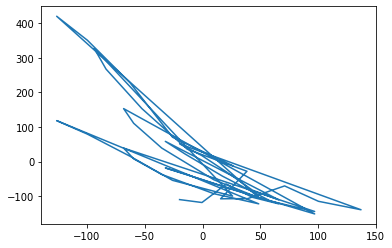

subject_15_stimulus_15_component_0   subject_15_stimulus_14_component_0   SpearmanrResult(correlation=0.8909963985594237, pvalue=4.4270142901204965e-18)


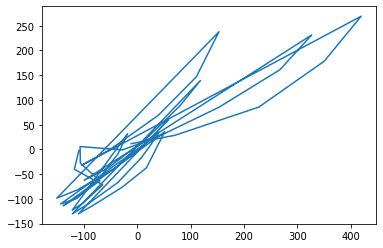

subject_15_stimulus_15_component_1   subject_12_stimulus_14_component_1   SpearmanrResult(correlation=0.7541622981832944, pvalue=2.5613477921304897e-10)


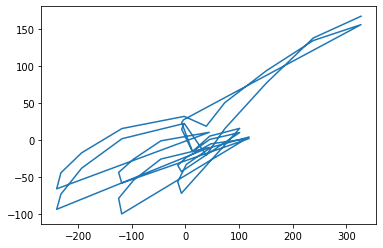

subject_15_stimulus_15_component_1   subject_12_stimulus_15_component_1   SpearmanrResult(correlation=0.9515437151644981, pvalue=3.142011472191545e-26)


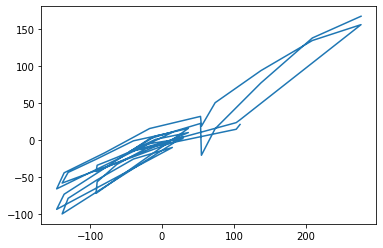

subject_15_stimulus_15_component_1   subject_15_stimulus_14_component_1   SpearmanrResult(correlation=0.7535654261704682, pvalue=2.694748527623485e-10)


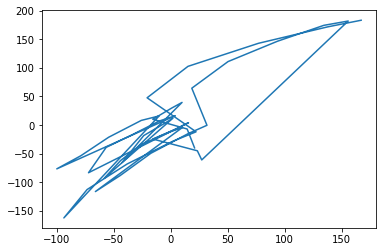

subject_15_stimulus_15_component_2   subject_12_stimulus_15_component_3   SpearmanrResult(correlation=0.7507028380998848, pvalue=3.4309140735064465e-10)


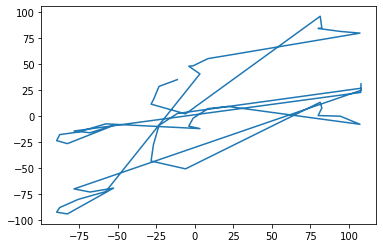

subject_15_stimulus_15_component_3   subject_14_stimulus_14_component_3   SpearmanrResult(correlation=0.8021133756760923, pvalue=2.528680741328695e-12)


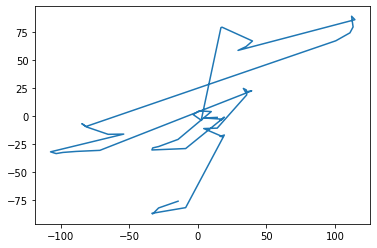

subject_15_stimulus_15_component_8   subject_13_stimulus_10_component_3   SpearmanrResult(correlation=0.7571188475390156, pvalue=1.9875643935770473e-10)


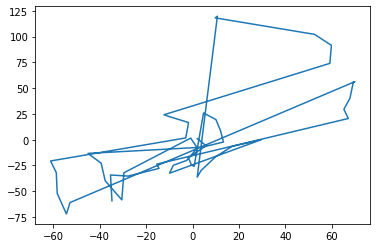

subject_15_stimulus_4_component_6   subject_12_stimulus_4_component_4   SpearmanrResult(correlation=0.7949375082112432, pvalue=1.3554293606240407e-140)


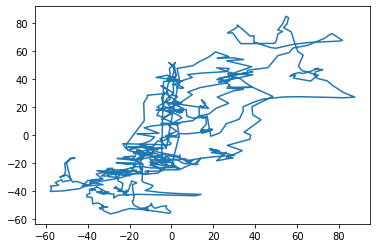

subject_15_stimulus_9_component_0   subject_15_stimulus_11_component_1   SpearmanrResult(correlation=0.8801645861907322, pvalue=5.611145276936752e-79)


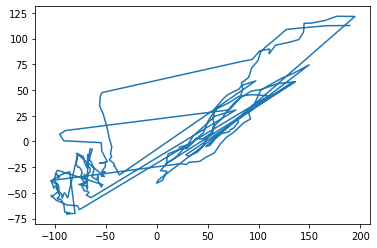

subject_15_stimulus_9_component_1   subject_12_stimulus_10_component_0   SpearmanrResult(correlation=-0.7912205963968797, pvalue=9.580626942788565e-53)


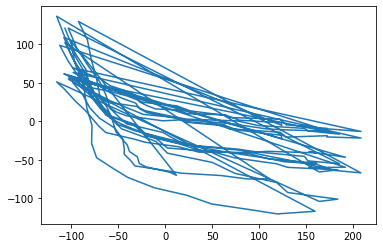

subject_15_stimulus_9_component_1   subject_12_stimulus_11_component_0   SpearmanrResult(correlation=-0.8467530270744026, pvalue=3.540082956464706e-67)


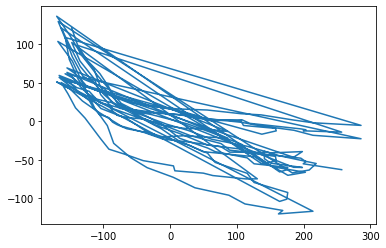

subject_15_stimulus_9_component_1   subject_12_stimulus_12_component_0   SpearmanrResult(correlation=-0.7988892820920421, pvalue=1.836569629358828e-54)


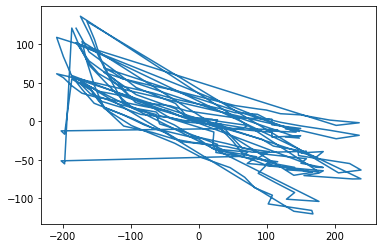

subject_15_stimulus_9_component_1   subject_12_stimulus_9_component_0   SpearmanrResult(correlation=-0.835993949589023, pvalue=5.7440580435018735e-64)


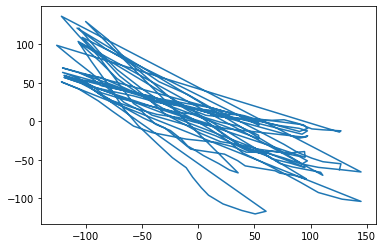

subject_15_stimulus_9_component_1   subject_15_stimulus_10_component_0   SpearmanrResult(correlation=-0.777910206774423, pvalue=6.269968508908563e-50)


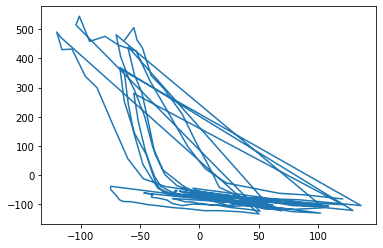

subject_15_stimulus_9_component_1   subject_15_stimulus_11_component_0   SpearmanrResult(correlation=-0.8956639872220001, pvalue=1.0183126830914353e-85)


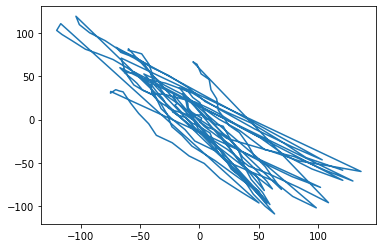

subject_15_stimulus_9_component_1   subject_15_stimulus_12_component_0   SpearmanrResult(correlation=0.7655271792913071, pvalue=1.7661544093246612e-47)


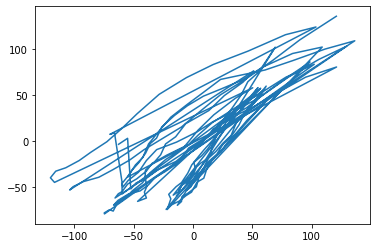

subject_16_stimulus_10_component_4   subject_10_stimulus_15_component_3   SpearmanrResult(correlation=-0.8111137385907473, pvalue=7.487507256424547e-20)


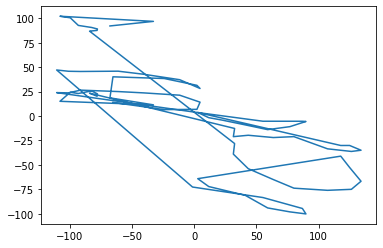

subject_16_stimulus_10_component_4   subject_14_stimulus_14_component_4   SpearmanrResult(correlation=0.7594373010624473, pvalue=3.2180389117078945e-16)


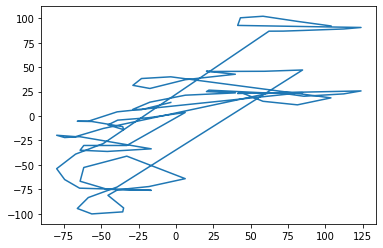

subject_16_stimulus_10_component_5   subject_12_stimulus_10_component_9   SpearmanrResult(correlation=0.7542244520684059, pvalue=7.917187042485324e-29)


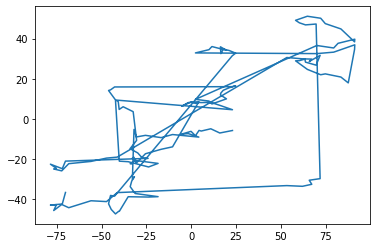

subject_16_stimulus_11_component_0   subject_16_stimulus_10_component_0   SpearmanrResult(correlation=0.909001406469761, pvalue=2.2315075048789584e-31)


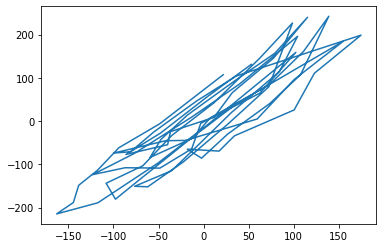

subject_16_stimulus_12_component_4   subject_16_stimulus_10_component_7   SpearmanrResult(correlation=-0.7614627285513361, pvalue=2.414125144619641e-16)


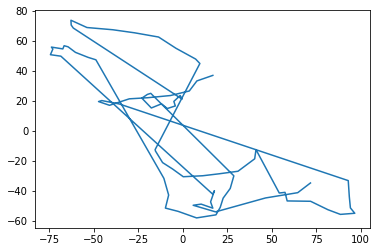

subject_16_stimulus_12_component_5   subject_13_stimulus_14_component_1   SpearmanrResult(correlation=0.7725636115686879, pvalue=4.808676556863409e-21)


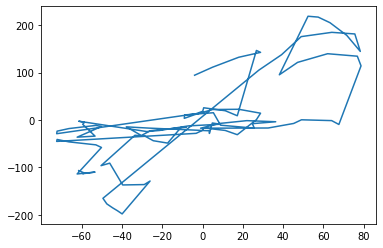

subject_16_stimulus_12_component_8   subject_10_stimulus_12_component_0   SpearmanrResult(correlation=-0.7705533973904208, pvalue=1.5931350878786335e-44)


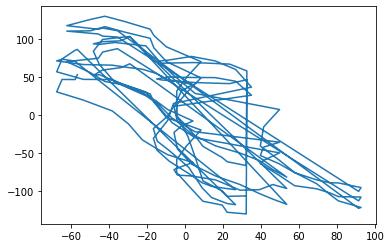

subject_16_stimulus_12_component_8   subject_16_stimulus_10_component_8   SpearmanrResult(correlation=0.7887482419127988, pvalue=3.723542228243837e-18)


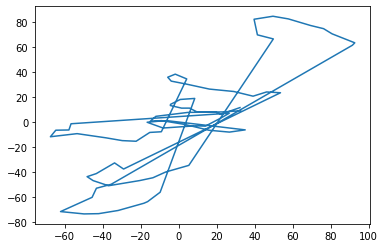

subject_16_stimulus_9_component_1   subject_16_stimulus_11_component_3   SpearmanrResult(correlation=-0.7513127051101736, pvalue=9.914251506979117e-16)


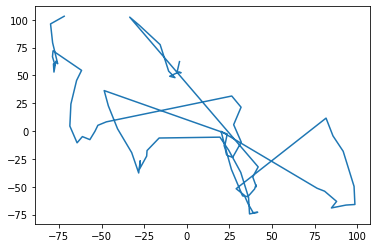

subject_16_stimulus_9_component_1   subject_16_stimulus_12_component_1   SpearmanrResult(correlation=-0.7800515705578998, pvalue=1.5008413285677782e-17)


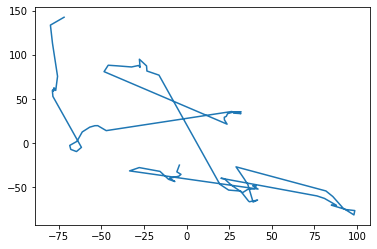

subject_16_stimulus_9_component_4   subject_16_stimulus_11_component_5   SpearmanrResult(correlation=-0.8340834505391469, pvalue=7.585612666137211e-22)


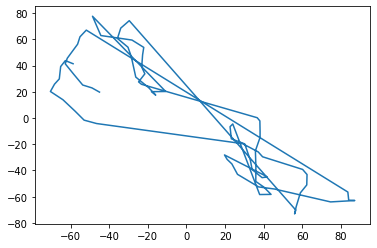

subject_16_stimulus_9_component_7   subject_10_stimulus_12_component_0   SpearmanrResult(correlation=0.8009123718308642, pvalue=1.8708946917463239e-50)


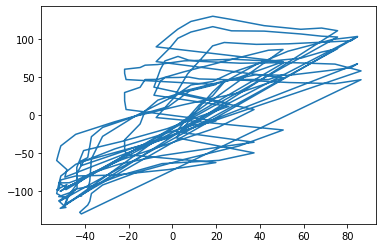

subject_17_stimulus_11_component_0   subject_17_stimulus_10_component_0   SpearmanrResult(correlation=0.8925701245150967, pvalue=1.2234721462426675e-67)


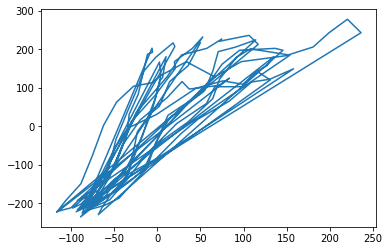

subject_17_stimulus_12_component_0   subject_17_stimulus_10_component_0   SpearmanrResult(correlation=0.8792183218945828, pvalue=4.3168968989386276e-63)


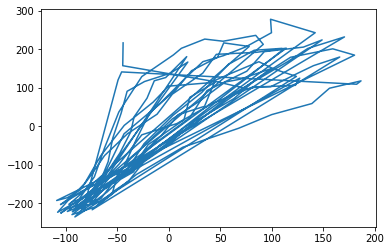

subject_17_stimulus_12_component_0   subject_17_stimulus_11_component_0   SpearmanrResult(correlation=0.875645972926783, pvalue=5.767618736214259e-62)


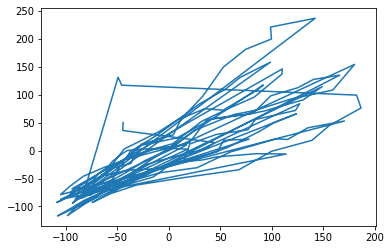

subject_17_stimulus_14_component_0   subject_12_stimulus_14_component_0   SpearmanrResult(correlation=0.914834999834985, pvalue=1.56119832714672e-20)


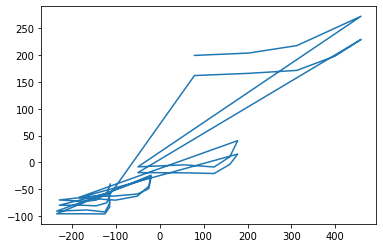

subject_17_stimulus_14_component_0   subject_12_stimulus_15_component_0   SpearmanrResult(correlation=0.766270408475228, pvalue=8.856515954894064e-11)


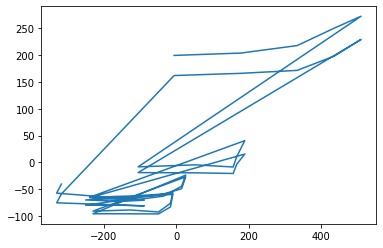

subject_17_stimulus_14_component_0   subject_14_stimulus_12_component_2   SpearmanrResult(correlation=-0.764640972219783, pvalue=1.0254630634122266e-10)


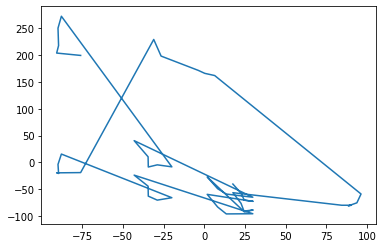

subject_17_stimulus_14_component_0   subject_15_stimulus_14_component_0   SpearmanrResult(correlation=0.8150300120048019, pvalue=5.851097436636853e-13)


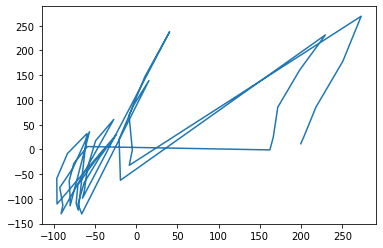

subject_17_stimulus_14_component_1   subject_12_stimulus_14_component_1   SpearmanrResult(correlation=-0.7933695124619365, pvalue=6.417196990938052e-12)


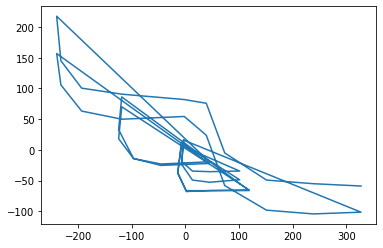

subject_17_stimulus_14_component_2   subject_16_stimulus_11_component_4   SpearmanrResult(correlation=0.7690522362607584, pvalue=8.01295733588997e-17)


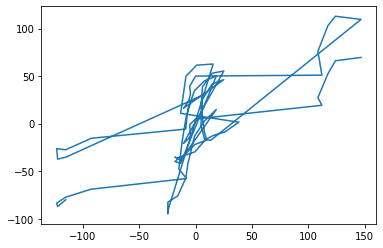

subject_17_stimulus_14_component_3   subject_12_stimulus_14_component_2   SpearmanrResult(correlation=0.8393034546805419, pvalue=2.675486113319742e-14)


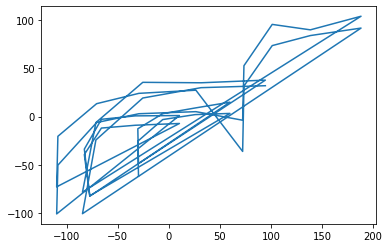

subject_17_stimulus_14_component_3   subject_15_stimulus_14_component_2   SpearmanrResult(correlation=0.7969747899159663, pvalue=4.395020774280983e-12)


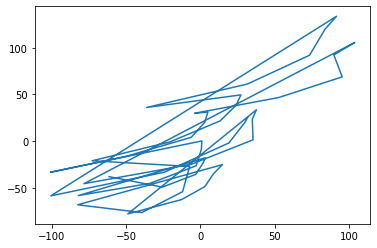

subject_17_stimulus_14_component_5   subject_12_stimulus_14_component_3   SpearmanrResult(correlation=0.770690829692918, pvalue=5.915101023023679e-11)


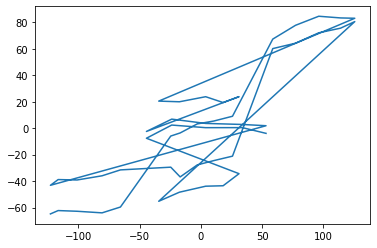

subject_17_stimulus_14_component_5   subject_13_stimulus_11_component_6   SpearmanrResult(correlation=0.9368067226890756, pvalue=1.5573139469956245e-23)


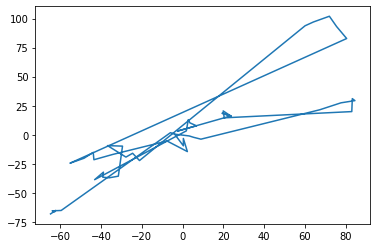

subject_17_stimulus_14_component_6   subject_13_stimulus_11_component_5   SpearmanrResult(correlation=-0.7575990396158462, pvalue=1.906708878293623e-10)


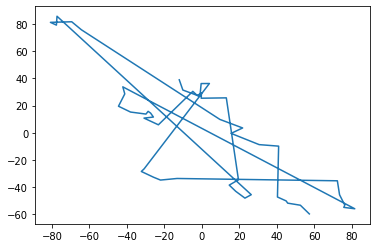

subject_17_stimulus_14_component_8   subject_15_stimulus_14_component_9   SpearmanrResult(correlation=0.7992797118847538, pvalue=3.436636103740453e-12)


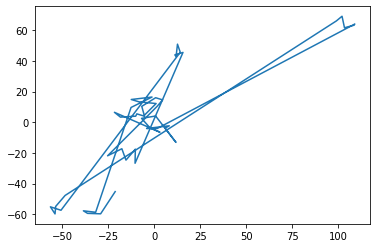

subject_17_stimulus_15_component_0   subject_12_stimulus_14_component_0   SpearmanrResult(correlation=0.8147028496429625, pvalue=6.080538622058337e-13)


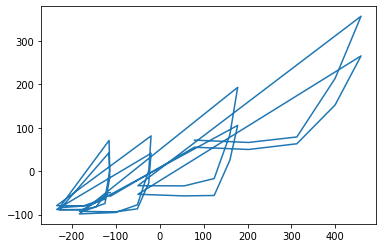

subject_17_stimulus_15_component_0   subject_12_stimulus_15_component_0   SpearmanrResult(correlation=0.8033635082584532, pvalue=2.2051079148770647e-12)


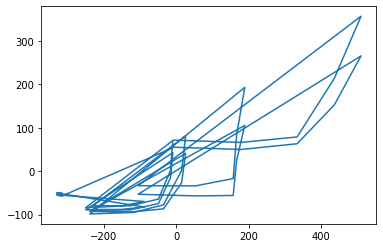

subject_17_stimulus_15_component_0   subject_14_stimulus_9_component_1   SpearmanrResult(correlation=-0.7707903844115479, pvalue=5.860969532897727e-11)


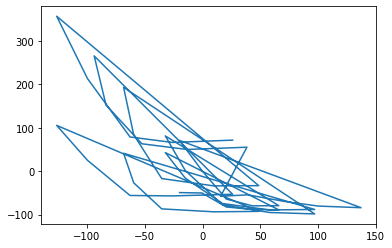

subject_17_stimulus_15_component_0   subject_15_stimulus_14_component_0   SpearmanrResult(correlation=0.927875150060024, pvalue=3.358209790475972e-22)


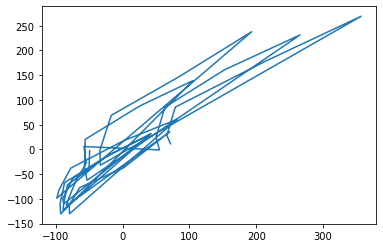

subject_17_stimulus_15_component_0   subject_15_stimulus_15_component_0   SpearmanrResult(correlation=0.8801440576230493, pvalue=3.805643235424032e-17)


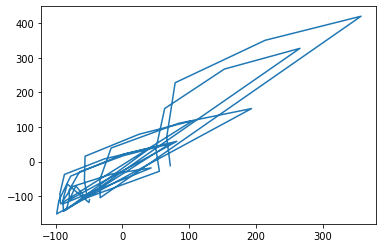

subject_17_stimulus_15_component_0   subject_17_stimulus_14_component_0   SpearmanrResult(correlation=0.7868907563025209, pvalue=1.2438183644678173e-11)


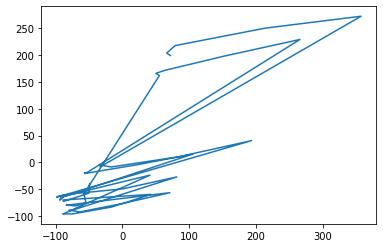

subject_17_stimulus_15_component_1   subject_12_stimulus_15_component_1   SpearmanrResult(correlation=0.8487208737964903, pvalue=7.024076102310029e-15)


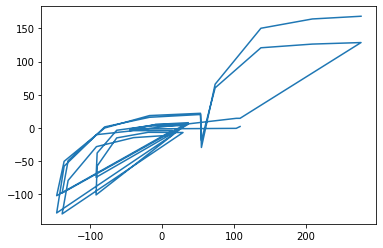

subject_17_stimulus_15_component_1   subject_13_stimulus_10_component_1   SpearmanrResult(correlation=0.7519327731092437, pvalue=3.0939643710670983e-10)


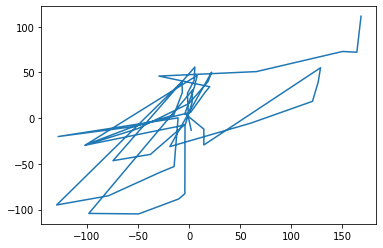

subject_17_stimulus_15_component_1   subject_15_stimulus_15_component_1   SpearmanrResult(correlation=0.914141656662665, pvalue=1.8815232013765998e-20)


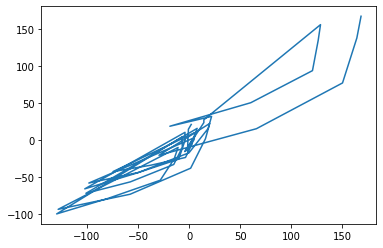

subject_17_stimulus_15_component_4   subject_12_stimulus_15_component_3   SpearmanrResult(correlation=0.7697298685586376, pvalue=6.462491087778748e-11)


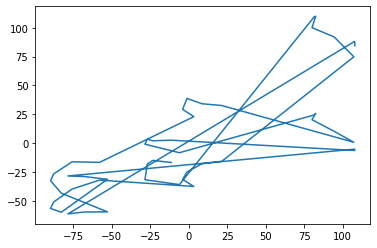

subject_17_stimulus_15_component_5   subject_15_stimulus_14_component_3   SpearmanrResult(correlation=-0.7630732292917167, pvalue=1.1794742141269023e-10)


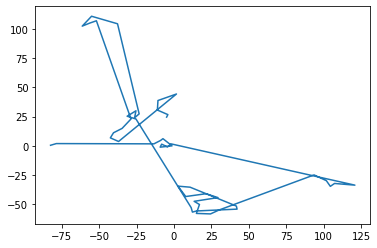

subject_17_stimulus_15_component_7   subject_13_stimulus_9_component_2   SpearmanrResult(correlation=-0.8387515006002401, pvalue=2.885917184172035e-14)


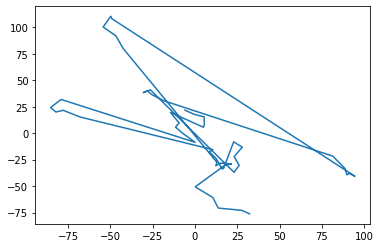

subject_17_stimulus_9_component_1   subject_17_stimulus_10_component_0   SpearmanrResult(correlation=-0.8619296449013918, pvalue=6.050524829867778e-58)


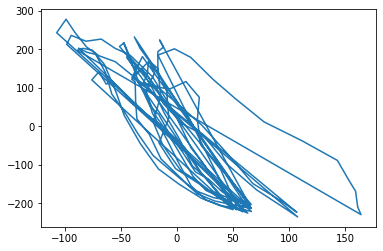

subject_17_stimulus_9_component_1   subject_17_stimulus_11_component_0   SpearmanrResult(correlation=-0.7928512329436022, pvalue=9.885563132068571e-43)


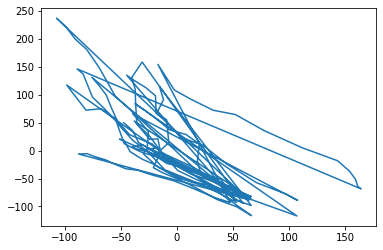

subject_2_stimulus_1_component_1   subject_16_stimulus_9_component_7   SpearmanrResult(correlation=-0.7762077098071309, pvalue=4.4620126131031915e-178)


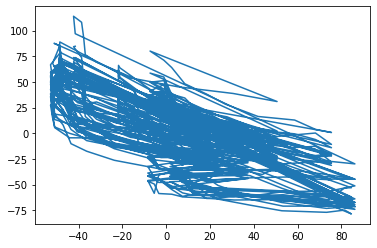

subject_2_stimulus_2_component_1   subject_10_stimulus_23_component_2   SpearmanrResult(correlation=0.7888968482983808, pvalue=7.428088419464775e-188)


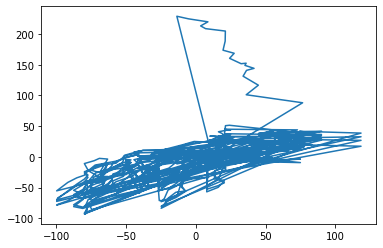

subject_3_stimulus_0_component_1   subject_16_stimulus_11_component_8   SpearmanrResult(correlation=-0.8204548725029425, pvalue=4.610581027662817e-157)


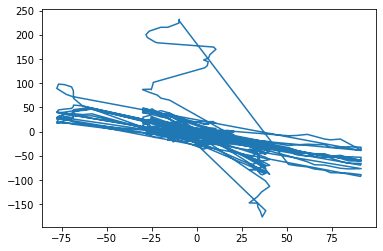

subject_4_stimulus_2_component_0   subject_10_stimulus_15_component_2   SpearmanrResult(correlation=-0.7599332721450097, pvalue=1.8400336093903997e-136)


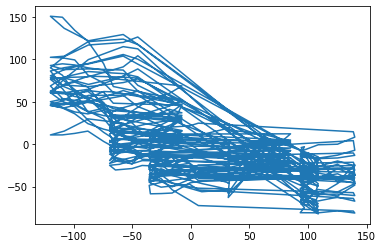

subject_4_stimulus_2_component_0   subject_2_stimulus_2_component_1   SpearmanrResult(correlation=-0.7848547488416121, pvalue=1.1425659012476209e-184)


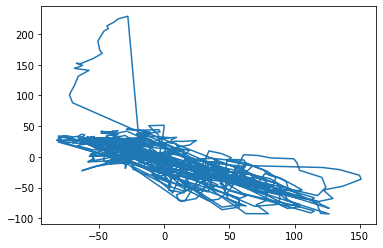

subject_4_stimulus_2_component_1   subject_4_stimulus_1_component_0   SpearmanrResult(correlation=-0.8375347303267687, pvalue=1.1859448338640287e-190)


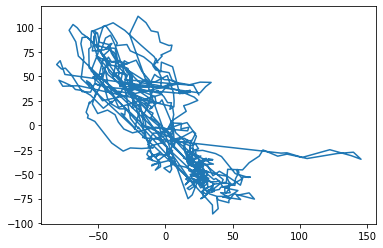

subject_4_stimulus_3_component_0   subject_16_stimulus_9_component_1   SpearmanrResult(correlation=-0.7566724049699083, pvalue=1.2051992628681174e-134)


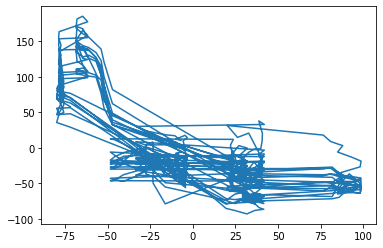

subject_5_stimulus_0_component_1   subject_1_stimulus_1_component_0   SpearmanrResult(correlation=-0.7951186891435618, pvalue=4.185366312788925e-158)


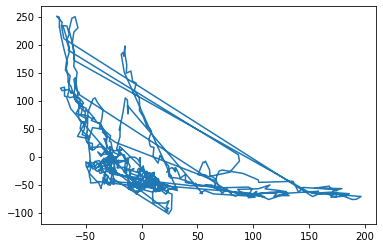

subject_7_stimulus_2_component_0   subject_7_stimulus_1_component_0   SpearmanrResult(correlation=0.944583077509798, pvalue=2.8411650422460846e-267)


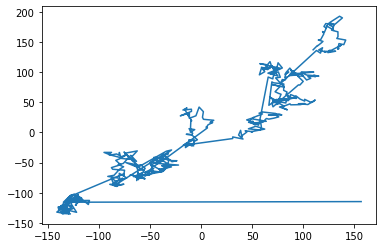

subject_7_stimulus_2_component_4   subject_7_stimulus_1_component_3   SpearmanrResult(correlation=0.8296396111301946, pvalue=7.875348116600594e-141)


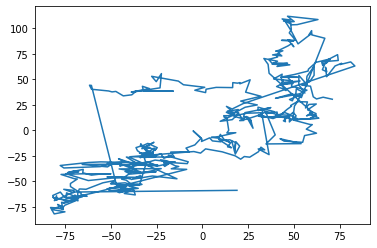

subject_7_stimulus_3_component_0   subject_7_stimulus_1_component_0   SpearmanrResult(correlation=0.9385488336700738, pvalue=2.4303680105959085e-255)


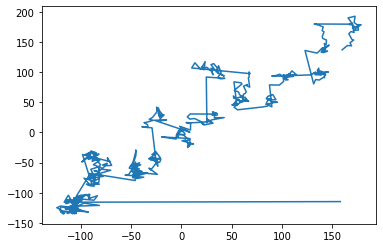

subject_7_stimulus_3_component_0   subject_7_stimulus_2_component_0   SpearmanrResult(correlation=0.971140905349349, pvalue=0.0)


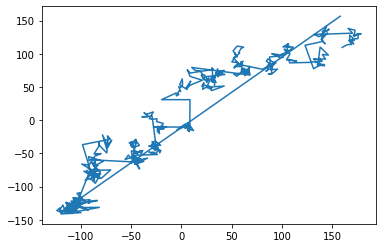

subject_7_stimulus_3_component_2   subject_7_stimulus_1_component_2   SpearmanrResult(correlation=0.8366177739430543, pvalue=2.3374959520267016e-145)


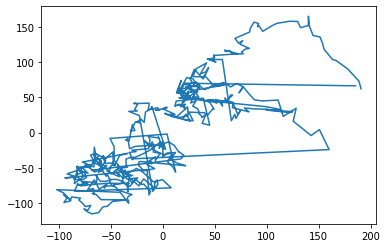

subject_7_stimulus_3_component_2   subject_7_stimulus_2_component_3   SpearmanrResult(correlation=0.7505772551013692, pvalue=1.1181405568211978e-100)


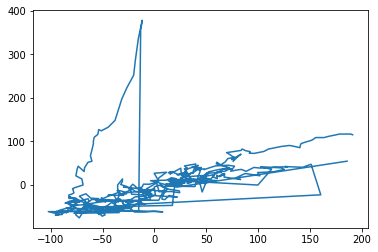

subject_7_stimulus_3_component_4   subject_7_stimulus_1_component_3   SpearmanrResult(correlation=0.9185074871772678, pvalue=5.589509664980174e-223)


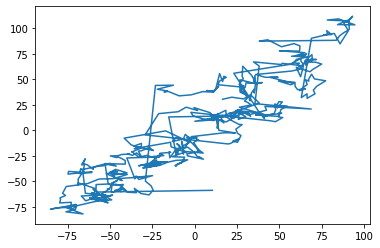

subject_7_stimulus_3_component_4   subject_7_stimulus_2_component_4   SpearmanrResult(correlation=0.8791368265980744, pvalue=1.5893522320739383e-178)


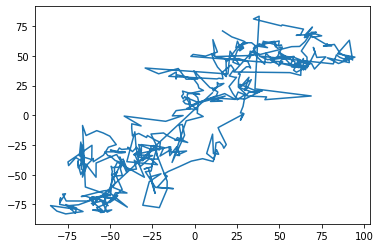

In [12]:
file_df = load_all_files()
file_df = file_df.set_index('file_name')
file_df['file_data'] = load_file_data(file_df['path'])
analysis_df = correlate_all_models(file_df)

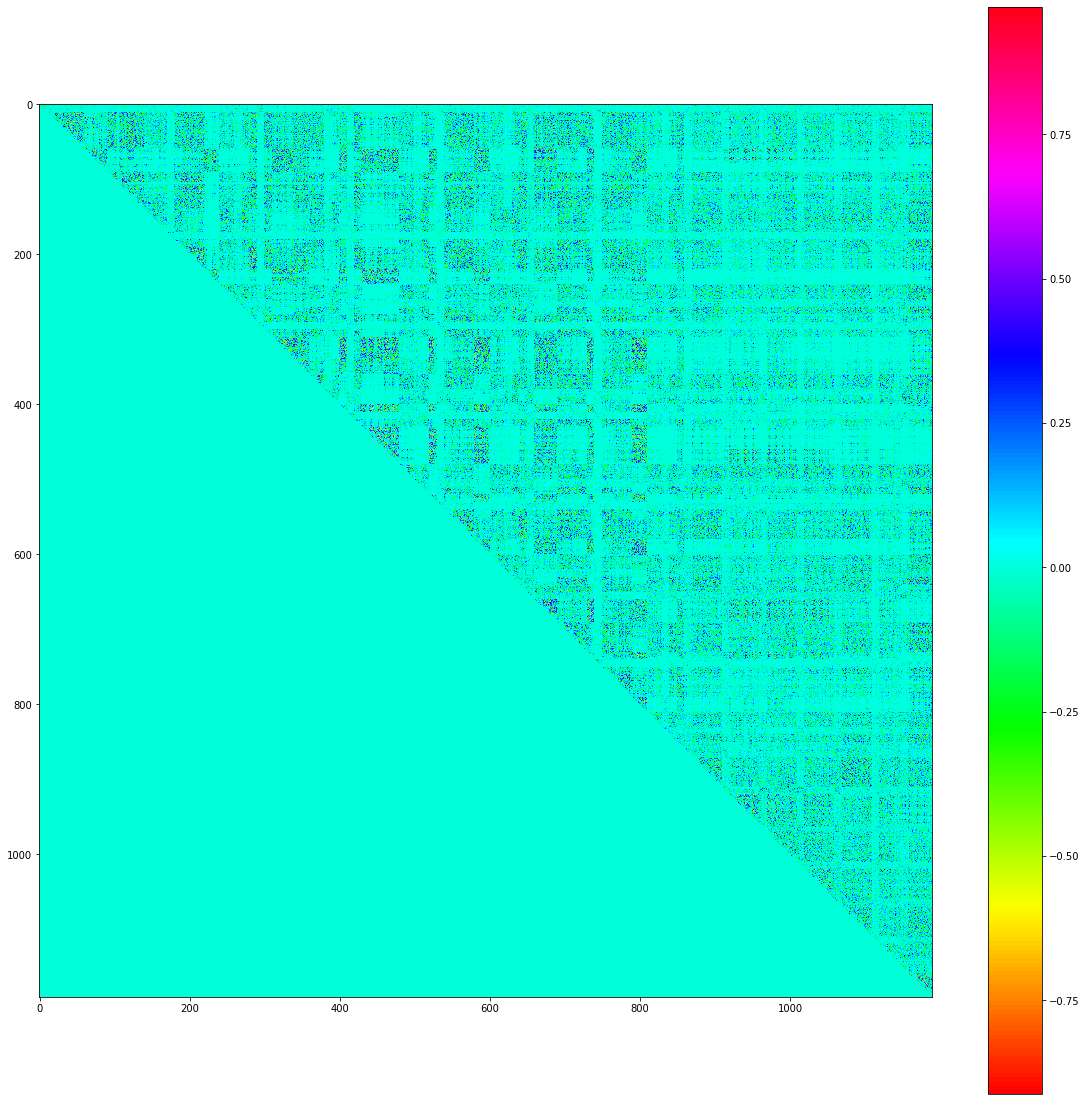

In [22]:
analysis_df
fig = plt.figure(figsize=(20, 20))
plt.imshow(analysis_df, cmap='hsv')
plt.colorbar()
plt.show()

In [30]:
pickle_file(analysis_df, n_components)